# Outlier detection 4 metodi

Eliminazione degli outliers condivisi da almeno 4 metodi

In [1]:
#!pip install tabulate

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tabulate import tabulate
import seaborn as sns
#import scikitplot as skplt
from numpy import percentile
import math

#pandas
from pandas.plotting import parallel_coordinates
from datetime import date, datetime

#sklearn
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler
from sklearn.cluster import DBSCAN

from sklearn.decomposition import PCA
#from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import learning_curve

from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_auc_score, precision_score, recall_score, make_scorer
from sklearn.metrics import plot_confusion_matrix

from sklearn.neighbors import NearestNeighbors 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

#scikitplot
#from scikitplot.metrics import plot_roc
#from scikitplot.metrics import plot_precision_recall
#from scikitplot.metrics import plot_lift_curve
#from scikitplot.metrics import plot_cumulative_gain

#mlxtend
#from mlxtend.plotting import plot_decision_regions

#matplotlib
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import pyplot

#seaborn
import seaborn as sns

#scipy
import scipy.stats as stats
from scipy.stats import shapiro, mannwhitneyu, normaltest, kstest
from scipy.stats import boxcox, yeojohnson

from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random

from pyod.models.abod import ABOD
from pyod.models.knn import KNN

In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from collections import defaultdict

from sklearn.model_selection import train_test_split

# Data Preparation

In [4]:
df = pd.read_csv('../data/csv_files/train.csv')
df_numeric = df.drop(['subject','ActivityName'], axis=1)
X = df.drop(['subject', 'Activity','ActivityName'], axis=1).values
y = df['ActivityName']
X.shape

(7352, 561)

In [5]:
df_numeric.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,5
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,5
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,5
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,5
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,5


## Dataset per model approaches

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Visual Approach

## Box Plot

Si analizzano le variabili relative ai segnali dell'accelerometro

# Proximity based approaches

## Density based (DBSCAN - LOF)

# DBSCAN

In [7]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [8]:
scl = StandardScaler()
scaled_df = scl.fit_transform(df_numeric)

In [9]:
df_dbscan = pd.DataFrame(scaled_df, columns = df_numeric.columns)

**Parametri iniziali randomici**

**Testo differenti min_samples e eps**

In [10]:
eps_to_test = list(range(1, 10, 1))
min_samples_to_test = list(range(5, 50, 5))

print("eps:", eps_to_test)
print("min_samples:", min_samples_to_test)

eps: [1, 2, 3, 4, 5, 6, 7, 8, 9]
min_samples: [5, 10, 15, 20, 25, 30, 35, 40, 45]


In [11]:
def get_metrics(eps, min_samples, dataset, iter_):
    
    # Fitting ======================================================================
    
    dbscan = DBSCAN(eps = eps, min_samples = min_samples)
    dbscan.fit(dataset)
    
    # Mean Noise Point Distance metric =============================================
    noise_indices = dbscan.labels_ == -1
    
    if True in noise_indices:
        neighboors = NearestNeighbors(n_neighbors = 6).fit(dataset)
        distances, indices = neighboors.kneighbors(dataset)
        noise_distances = distances[noise_indices, 1:]
        noise_mean_distance = round(noise_distances.mean(), 3)
    else:
        noise_mean_distance = None
        
    # Number of found Clusters metric ==============================================
    
    number_of_clusters = len(set(dbscan.labels_[dbscan.labels_ >= 0]))
    
    # Log ==========================================================================
    print("%3d | Tested with eps = %3s and min_samples = %3s | %5s %4s" % (iter_, eps, min_samples, str(noise_mean_distance), number_of_clusters))
    
    #return(noise_mean_distance, number_of_clusters)

In [12]:
# Dataframe per la metrica sulla distanza media dei noise points dai K punti più vicini
results_noise = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test)

# Dataframe per la metrica sul numero di cluster
results_clusters = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test)

#### Best DBSCAN

In [13]:
scaled_dbscan = pd.DataFrame(scaled_df, columns = df_numeric.columns)

scaled_df = dataset scalato in valori; df_dbscan = scaled_df come dataframe

In [14]:
# Istantiating with eps = 9 and min_samples = 5 (best model) | 25 clusters --> 6789
best_dbscan_model = DBSCAN(eps=8, min_samples=5)

# Fitting
best_dbscan_model.fit(df_dbscan)

# Extracting labels
df_dbscan["LABEL"] = best_dbscan_model.labels_
df_dbscan["LABEL"]

0      -1
1      -1
2      -1
3      -1
4      -1
       ..
7347   -1
7348   -1
7349   -1
7350   -1
7351   -1
Name: LABEL, Length: 7352, dtype: int64

In [15]:
np.unique(best_dbscan_model.labels_, return_counts=True)

(array([-1,  0,  1], dtype=int64), array([7340,    5,    7], dtype=int64))

In [16]:
dbscan_indexes = list(df_numeric.index)
dbscan_indexes #indici di tutti i dati

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [17]:
scaled_dbscan_id = df_dbscan.copy()
scaled_dbscan_id

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,Activity,LABEL
0,0.200642,-0.063683,-0.419628,-0.868814,-0.939441,-0.737529,-0.859817,-0.939019,-0.766437,-0.856036,...,-0.276399,-0.360603,0.062940,-0.778427,-0.026080,-0.687219,0.407946,-0.007568,0.777584,-1
1,0.055948,0.031486,-0.253908,-0.875426,-0.923902,-0.849304,-0.868531,-0.921998,-0.848928,-0.871359,...,-0.767990,0.133011,-0.021461,-1.218805,1.484470,-0.694138,0.409117,0.007875,0.777584,-1
2,0.073515,-0.043416,-0.076295,-0.869039,-0.907760,-0.893785,-0.863137,-0.898854,-0.896701,-0.863323,...,-0.438316,-0.377840,0.391976,0.151207,1.704201,-0.702239,0.410288,0.026502,0.777584,-1
3,0.066696,-0.208422,-0.249712,-0.870626,-0.940022,-0.921805,-0.864503,-0.938124,-0.925279,-0.863323,...,0.463155,-0.135025,-0.033637,1.037851,-1.003019,-0.701684,0.414650,0.031714,0.777584,-1
4,0.030469,0.027587,-0.109848,-0.875188,-0.934878,-0.921343,-0.867384,-0.931789,-0.928028,-0.870260,...,-0.240313,0.340406,0.268486,1.125918,-1.276282,-0.700152,0.425463,0.045225,0.777584,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.358361,-0.967904,-1.273005,0.913859,1.095963,1.628612,0.821169,1.174137,1.609686,1.247727,...,-0.829197,-0.591277,1.846034,0.325923,-0.878008,-0.590763,0.605162,0.380984,-0.941926,-1
7348,-0.009044,0.243731,-0.676787,0.824887,1.026150,1.586100,0.726245,1.023755,1.658407,1.076279,...,-0.180290,0.166951,1.948561,-1.459501,0.849894,-0.551598,0.652468,0.381820,-0.941926,-1
7349,-0.015668,0.016781,1.132221,0.862975,0.810002,2.100249,0.768781,0.880813,2.266963,0.941403,...,1.044548,0.131018,-0.599877,1.406760,1.479571,-0.565848,0.640597,0.348709,-0.941926,-1
7350,0.215866,-0.028123,-0.867710,0.860922,0.794902,2.086778,0.754697,0.944019,2.235301,1.047375,...,0.913569,-0.326769,1.558312,1.525574,-1.220854,-0.577668,0.631478,0.293276,-0.941926,-1


In [18]:
scaled_dbscan_id['id'] = dbscan_indexes #inserisco id come colonna nel df
scaled_dbscan_id

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,Activity,LABEL,id
0,0.200642,-0.063683,-0.419628,-0.868814,-0.939441,-0.737529,-0.859817,-0.939019,-0.766437,-0.856036,...,-0.360603,0.062940,-0.778427,-0.026080,-0.687219,0.407946,-0.007568,0.777584,-1,0
1,0.055948,0.031486,-0.253908,-0.875426,-0.923902,-0.849304,-0.868531,-0.921998,-0.848928,-0.871359,...,0.133011,-0.021461,-1.218805,1.484470,-0.694138,0.409117,0.007875,0.777584,-1,1
2,0.073515,-0.043416,-0.076295,-0.869039,-0.907760,-0.893785,-0.863137,-0.898854,-0.896701,-0.863323,...,-0.377840,0.391976,0.151207,1.704201,-0.702239,0.410288,0.026502,0.777584,-1,2
3,0.066696,-0.208422,-0.249712,-0.870626,-0.940022,-0.921805,-0.864503,-0.938124,-0.925279,-0.863323,...,-0.135025,-0.033637,1.037851,-1.003019,-0.701684,0.414650,0.031714,0.777584,-1,3
4,0.030469,0.027587,-0.109848,-0.875188,-0.934878,-0.921343,-0.867384,-0.931789,-0.928028,-0.870260,...,0.340406,0.268486,1.125918,-1.276282,-0.700152,0.425463,0.045225,0.777584,-1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.358361,-0.967904,-1.273005,0.913859,1.095963,1.628612,0.821169,1.174137,1.609686,1.247727,...,-0.591277,1.846034,0.325923,-0.878008,-0.590763,0.605162,0.380984,-0.941926,-1,7347
7348,-0.009044,0.243731,-0.676787,0.824887,1.026150,1.586100,0.726245,1.023755,1.658407,1.076279,...,0.166951,1.948561,-1.459501,0.849894,-0.551598,0.652468,0.381820,-0.941926,-1,7348
7349,-0.015668,0.016781,1.132221,0.862975,0.810002,2.100249,0.768781,0.880813,2.266963,0.941403,...,0.131018,-0.599877,1.406760,1.479571,-0.565848,0.640597,0.348709,-0.941926,-1,7349
7350,0.215866,-0.028123,-0.867710,0.860922,0.794902,2.086778,0.754697,0.944019,2.235301,1.047375,...,-0.326769,1.558312,1.525574,-1.220854,-0.577668,0.631478,0.293276,-0.941926,-1,7350


In [19]:
scaled_dbscan_id = scaled_dbscan_id.set_index('id') #inserisco id
scaled_dbscan_id

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,Activity,LABEL
id,,,,,,,,,,,,,,,,,,,,,
0,0.200642,-0.063683,-0.419628,-0.868814,-0.939441,-0.737529,-0.859817,-0.939019,-0.766437,-0.856036,...,-0.276399,-0.360603,0.062940,-0.778427,-0.026080,-0.687219,0.407946,-0.007568,0.777584,-1
1,0.055948,0.031486,-0.253908,-0.875426,-0.923902,-0.849304,-0.868531,-0.921998,-0.848928,-0.871359,...,-0.767990,0.133011,-0.021461,-1.218805,1.484470,-0.694138,0.409117,0.007875,0.777584,-1
2,0.073515,-0.043416,-0.076295,-0.869039,-0.907760,-0.893785,-0.863137,-0.898854,-0.896701,-0.863323,...,-0.438316,-0.377840,0.391976,0.151207,1.704201,-0.702239,0.410288,0.026502,0.777584,-1
3,0.066696,-0.208422,-0.249712,-0.870626,-0.940022,-0.921805,-0.864503,-0.938124,-0.925279,-0.863323,...,0.463155,-0.135025,-0.033637,1.037851,-1.003019,-0.701684,0.414650,0.031714,0.777584,-1
4,0.030469,0.027587,-0.109848,-0.875188,-0.934878,-0.921343,-0.867384,-0.931789,-0.928028,-0.870260,...,-0.240313,0.340406,0.268486,1.125918,-1.276282,-0.700152,0.425463,0.045225,0.777584,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.358361,-0.967904,-1.273005,0.913859,1.095963,1.628612,0.821169,1.174137,1.609686,1.247727,...,-0.829197,-0.591277,1.846034,0.325923,-0.878008,-0.590763,0.605162,0.380984,-0.941926,-1
7348,-0.009044,0.243731,-0.676787,0.824887,1.026150,1.586100,0.726245,1.023755,1.658407,1.076279,...,-0.180290,0.166951,1.948561,-1.459501,0.849894,-0.551598,0.652468,0.381820,-0.941926,-1
7349,-0.015668,0.016781,1.132221,0.862975,0.810002,2.100249,0.768781,0.880813,2.266963,0.941403,...,1.044548,0.131018,-0.599877,1.406760,1.479571,-0.565848,0.640597,0.348709,-0.941926,-1


Ottengo variabile con id degli outliers (NO PUNTEGGI)

In [20]:
#retrieve id of outliers ---------------------------
outliers_dbscan = list(df_dbscan[df_dbscan['LABEL'] == -1].index)
outliers_dbscan[:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [21]:
len(outliers_dbscan)

7340

In [22]:
df.loc[np.where(best_dbscan_model.labels_==-1)]

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,2,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,2,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,2,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,2,WALKING_UPSTAIRS


## LOF

The anomaly score of each sample is called the Local Outlier Factor. It measures the local deviation of the density of a given sample with respect to its neighbors. It is local in that the anomaly score depends on how isolated the object is with respect to the surrounding neighborhood.

- il numerod di neighbors non rende
- Probabilmente il problema è il dataset conn differenti densità: vedesi risultati DBSCAN e LOF

#### Test

In [23]:
n_neighbors_test = list(range(5, 20, 5))

for n_neighbor in n_neighbors_test:

    clf_LOF = LocalOutlierFactor(n_neighbors=n_neighbor) # prof 2
    outliers = clf_LOF.fit_predict(X) # si ottengono direttamente gli outlier
    outlier_indexes = np.where(outliers==-1)[0]
    print("per", n_neighbor ,"vicini:", len(outlier_indexes))

per 5 vicini: 6
per 10 vicini: 7
per 15 vicini: 9


#### Best LOF

In [24]:
# Miglior LOF
clf_LOF = LocalOutlierFactor(n_neighbors=20) 
outliers = clf_LOF.fit_predict(X) # si ottengono direttamente gli outlier

In [25]:
len(outliers) #tutti i valori

7352

In [26]:
clf_LOF.negative_outlier_factor_ # si ottiene il LOF score, maggiore il valore più i dati sono inliers

array([-1.51250875, -1.04592516, -1.02306275, ..., -1.02502088,
       -1.02111953, -1.00732075])

In [27]:
np.unique(outliers, return_counts=True)

(array([-1,  1]), array([   9, 7343], dtype=int64))

**Abbiamo 9 outliers**

In [28]:
np.where(outliers==-1)

(array([   0,   70,   71,  564, 1904, 2532, 4729, 4730, 5066], dtype=int64),)

In [29]:
clf_LOF.negative_outlier_factor_[np.where(outliers==-1)] # i valori non sono molto negativi

array([-1.51250875, -1.76979158, -1.75632535, -1.50302003, -1.74529324,
       -1.5282831 , -1.5520981 , -1.73463948, -1.67653791])

Si ottengono gli indici e i punteggi degli outliers

In [30]:
## ottenere gli indici degli outliers e i loro punteggi
outlier_indexes = np.where(outliers==-1)[0] #indici
print(len(outlier_indexes))

outlier_scores = clf_LOF.negative_outlier_factor_[outlier_indexes]
print(len(outlier_scores)) #punteggi

9
9


In [31]:
outlier_indexes

array([   0,   70,   71,  564, 1904, 2532, 4729, 4730, 5066], dtype=int64)

In [32]:
outlier_scores

array([-1.51250875, -1.76979158, -1.75632535, -1.50302003, -1.74529324,
       -1.5282831 , -1.5520981 , -1.73463948, -1.67653791])

In [33]:
max_val = np.max(clf_LOF.negative_outlier_factor_[np.where(outliers==-1)])
max_val

-1.5030200287611248

In [34]:
np.min(clf_LOF.negative_outlier_factor_[np.where(outliers==-1)])

-1.769791579297301

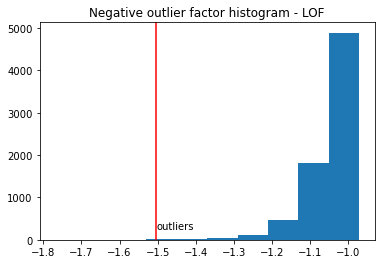

In [35]:
plt.hist(clf_LOF.negative_outlier_factor_, bins=10)
plt.axvline(max_val, c='r')
plt.text(max_val, 250, 'outliers')
plt.title("Negative outlier factor histogram - LOF")

plt.show()
# distribuzione del LOF score, con barra per il minor outlier; 

**Si filtrano gli outliers dal dataset**

In [36]:
# filter outlier values
X[outlier_indexes]

array([[ 0.28858451, -0.02029417, -0.13290514, ..., -0.84124676,
         0.17994061, -0.05862692],
       [-0.36120533, -0.26812111,  0.17689637, ...,  0.50873322,
        -0.49613177, -0.50619728],
       [-0.27706634, -0.68409659,  0.34665772, ...,  0.66828427,
        -0.3366412 , -0.67268482],
       ...,
       [ 0.27479126, -0.01441455, -0.11025319, ..., -0.70860966,
        -0.04803844, -0.128695  ],
       [ 0.27791534, -0.01619541, -0.11841212, ..., -0.70882895,
        -0.04898741, -0.12745808],
       [ 0.30485751, -0.02015167, -0.10662702, ..., -0.66422331,
         0.19773067, -0.19956916]])

In [37]:
X[outliers==-1]

array([[ 0.28858451, -0.02029417, -0.13290514, ..., -0.84124676,
         0.17994061, -0.05862692],
       [-0.36120533, -0.26812111,  0.17689637, ...,  0.50873322,
        -0.49613177, -0.50619728],
       [-0.27706634, -0.68409659,  0.34665772, ...,  0.66828427,
        -0.3366412 , -0.67268482],
       ...,
       [ 0.27479126, -0.01441455, -0.11025319, ..., -0.70860966,
        -0.04803844, -0.128695  ],
       [ 0.27791534, -0.01619541, -0.11841212, ..., -0.70882895,
        -0.04898741, -0.12745808],
       [ 0.30485751, -0.02015167, -0.10662702, ..., -0.66422331,
         0.19773067, -0.19956916]])

In [38]:
y_outliers  = X[outliers==-1]
len(y_outliers)

9

In [39]:
y_outliers

array([[ 0.28858451, -0.02029417, -0.13290514, ..., -0.84124676,
         0.17994061, -0.05862692],
       [-0.36120533, -0.26812111,  0.17689637, ...,  0.50873322,
        -0.49613177, -0.50619728],
       [-0.27706634, -0.68409659,  0.34665772, ...,  0.66828427,
        -0.3366412 , -0.67268482],
       ...,
       [ 0.27479126, -0.01441455, -0.11025319, ..., -0.70860966,
        -0.04803844, -0.128695  ],
       [ 0.27791534, -0.01619541, -0.11841212, ..., -0.70882895,
        -0.04898741, -0.12745808],
       [ 0.30485751, -0.02015167, -0.10662702, ..., -0.66422331,
         0.19773067, -0.19956916]])

**negative_outlier_factor_**

**The opposite LOF of the training samples.** The higher, the more normal.
- Inliers tend to have a **LOF score close to 1 (negative_outlier_factor_ close to -1)**
- Outliers tend to have a **larger LOF score**.

The local outlier factor (LOF) of a sample captures its supposed ‘degree of abnormality’. It is the average of the ratio of the local reachability density of a sample and those of its k-nearest neighbors.

### Top 1% outliers

In [40]:
import math

In [41]:
len(clf_LOF.negative_outlier_factor_)

7352

In [42]:
len(X)

7352

In [43]:
top1perc = int(math.ceil(len(y_outliers)*0.01))
top1perc

1

In [44]:
clf_LOF.negative_outlier_factor_

array([-1.51250875, -1.04592516, -1.02306275, ..., -1.02502088,
       -1.02111953, -1.00732075])

Lista avete indice e score per outliers **np.where(y_pred ==-1)**

In [45]:
outlier_factor_list = []

for i in range(0,len(outlier_scores)):
    outlier_factor_list.append((outlier_indexes[i], outlier_scores[i]))
    
outlier_factor_list[:10]

[(0, -1.5125087450247827),
 (70, -1.769791579297301),
 (71, -1.7563253500681557),
 (564, -1.5030200287611248),
 (1904, -1.7452932413212472),
 (2532, -1.5282831036784479),
 (4729, -1.5520980998534741),
 (4730, -1.734639479878998),
 (5066, -1.6765379099568674)]

In [46]:
def outlier_score(elem):
    return elem[1]

#We sort in ascending order with respect to LOF factor
outlier_factor_list = sorted(outlier_factor_list, key=outlier_score)

In [47]:
len(outlier_factor_list)

9

In [48]:
outlier_factor_list[:23]

[(70, -1.769791579297301),
 (71, -1.7563253500681557),
 (1904, -1.7452932413212472),
 (4730, -1.734639479878998),
 (5066, -1.6765379099568674),
 (4729, -1.5520980998534741),
 (2532, -1.5282831036784479),
 (0, -1.5125087450247827),
 (564, -1.5030200287611248)]

In [49]:
min([i[1] for i in outlier_factor_list])

-1.769791579297301

In [50]:
max([i[1] for i in outlier_factor_list])

-1.5030200287611248

#### TOP 1% outliers

In [51]:
top_outliers_LOF = outlier_factor_list[:top1perc]
len(top_outliers_LOF)

1

In [52]:
top_outliers_LOF[:10]

[(70, -1.769791579297301)]

In [53]:
min([i[1] for i in top_outliers_LOF])

-1.769791579297301

In [54]:
indexes_list = [i[0] for i in top_outliers_LOF] #retrieve indexes of outliers
indexes_list

[70]

In [55]:
df_LOF_outliers = df.iloc[indexes_list]

In [56]:
df_LOF_outliers

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
70,-0.361205,-0.268121,0.176896,-0.599392,0.532506,0.004324,-0.664108,0.50226,0.048472,-0.717081,...,0.15283,0.149602,0.127245,0.192852,0.508733,-0.496132,-0.506197,1,6,LAYING


In [57]:
#retrieve id of outliers
outliers_id = list(df_LOF_outliers.index)
outliers_id[:10]

[70]

In [58]:
len(outliers_id)

1

In [59]:
top_outliers_LOF[:5]

[(70, -1.769791579297301)]

In [60]:
top_outliers_lof_id = []

for i, val in top_outliers_LOF:
    top_outliers_lof_id.append((df.iloc[i].name, val))

print("Id with LOF score of outlierness")
top_outliers_lof_id[:10]


Id with LOF score of outlierness


[(70, -1.769791579297301)]

# Model based approaches

# Isolation Forest

In [61]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import make_scorer, f1_score
from sklearn import model_selection
from sklearn.datasets import make_classification

In [62]:
clf_if = IsolationForest(random_state=0)
clf_if.fit(X)

IsolationForest(random_state=0)

#### Decision function

In [63]:
anomlay_score_if = clf_if.decision_function(X)
len(anomlay_score_if)

7352

In [64]:
anomlay_score_if

array([0.08474725, 0.12963195, 0.13374194, ..., 0.06507785, 0.05999005,
       0.05983157])

### Predict

In [65]:
outliers_if = clf_if.predict(X)
np.unique(outliers_if, return_counts=True)

(array([-1,  1]), array([ 552, 6800], dtype=int64))

In [66]:
outliers_if

array([1, 1, 1, ..., 1, 1, 1])

In [67]:
outlier_indexes_if = np.where(outliers_if == -1)[0]
outlier_indexes_if

array([  64,   66,   67,   69,   70,   71,   72,  134,  136,  137,  138,
        140,  144,  237,  238,  289,  293,  299,  340,  344,  346,  378,
        481,  482,  486,  487,  688,  797,  817,  818,  819,  950,  954,
        955,  957,  962,  964, 1062, 1109, 1110, 1111, 1112, 1114, 1115,
       1117, 1118, 1119, 1122, 1126, 1209, 1211, 1223, 1240, 1241, 1242,
       1243, 1257, 1258, 1260, 1262, 1263, 1264, 1265, 1266, 1267, 1268,
       1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279,
       1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1304,
       1305, 1308, 1309, 1311, 1312, 1343, 1355, 1369, 1383, 1401, 1402,
       1403, 1408, 1415, 1420, 1421, 1422, 1423, 1424, 1442, 1445, 1446,
       1447, 1448, 1449, 1513, 1523, 1550, 1551, 1552, 1555, 1556, 1557,
       1558, 1559, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1575,
       1594, 1597, 1645, 1718, 1721, 1723, 1724, 1725, 1726, 1727, 1728,
       1729, 1730, 1731, 1732, 1733, 1734, 1735, 17

In [68]:
len(outlier_indexes_if)

552

In [69]:
outlier_scores_if = anomlay_score_if[np.where(outliers_if==-1)]
len(outlier_scores_if)

552

In [70]:
indexes_list_if = list(outlier_indexes_if)  #retrieve index of outliers
indexes_list_if

[64,
 66,
 67,
 69,
 70,
 71,
 72,
 134,
 136,
 137,
 138,
 140,
 144,
 237,
 238,
 289,
 293,
 299,
 340,
 344,
 346,
 378,
 481,
 482,
 486,
 487,
 688,
 797,
 817,
 818,
 819,
 950,
 954,
 955,
 957,
 962,
 964,
 1062,
 1109,
 1110,
 1111,
 1112,
 1114,
 1115,
 1117,
 1118,
 1119,
 1122,
 1126,
 1209,
 1211,
 1223,
 1240,
 1241,
 1242,
 1243,
 1257,
 1258,
 1260,
 1262,
 1263,
 1264,
 1265,
 1266,
 1267,
 1268,
 1269,
 1270,
 1271,
 1272,
 1273,
 1274,
 1275,
 1276,
 1277,
 1278,
 1279,
 1280,
 1281,
 1282,
 1283,
 1284,
 1285,
 1286,
 1287,
 1288,
 1289,
 1304,
 1305,
 1308,
 1309,
 1311,
 1312,
 1343,
 1355,
 1369,
 1383,
 1401,
 1402,
 1403,
 1408,
 1415,
 1420,
 1421,
 1422,
 1423,
 1424,
 1442,
 1445,
 1446,
 1447,
 1448,
 1449,
 1513,
 1523,
 1550,
 1551,
 1552,
 1555,
 1556,
 1557,
 1558,
 1559,
 1566,
 1567,
 1568,
 1569,
 1570,
 1571,
 1572,
 1573,
 1575,
 1594,
 1597,
 1645,
 1718,
 1721,
 1723,
 1724,
 1725,
 1726,
 1727,
 1728,
 1729,
 1730,
 1731,
 1732,
 1733,
 1734,
 

In [71]:
len(outlier_indexes_if)

552

In [72]:
np.min(outlier_scores_if)

-0.23013951676527722

In [73]:
np.max(outlier_scores_if)

-2.5011554443121753e-06

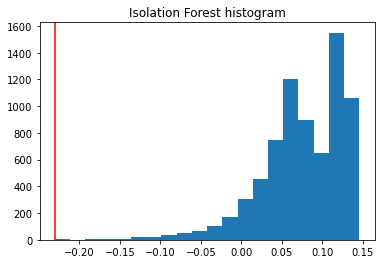

In [74]:
plt.hist(anomlay_score_if, bins=20)
plt.axvline(np.min(outlier_scores_if), c='r')

plt.title("Isolation Forest histogram")
plt.show()

### Top 1% outliers

In [75]:
len(outlier_scores_if)

552

In [76]:
outlier_if_list = []

for i in range(0,len(outlier_scores_if)):
    outlier_if_list.append((outlier_indexes_if[i], outlier_scores_if[i]))
    
outlier_if_list

[(64, -0.017231914143871707),
 (66, -0.023061347115383324),
 (67, -0.02104883651104439),
 (69, -0.03215969469022295),
 (70, -0.018152108463892258),
 (71, -0.05632194282688341),
 (72, -0.01960409311691491),
 (134, -0.06442670787515947),
 (136, -0.029988662696601498),
 (137, -0.012077694086607194),
 (138, -0.011551723820761972),
 (140, -0.01630644786510882),
 (144, -0.0015010905043564282),
 (237, -0.01029369329906904),
 (238, -0.02316833996335199),
 (289, -0.02240237097814013),
 (293, -0.007855118483056978),
 (299, -0.031227457798754577),
 (340, -0.007176490380161882),
 (344, -0.039126486480835054),
 (346, -0.008303295210554062),
 (378, -0.0020383398451927492),
 (481, -0.049033287707683115),
 (482, -0.014443355538681257),
 (486, -0.03575378943856222),
 (487, -0.07762410814798637),
 (688, -0.0067645974787526875),
 (797, -0.00040107595604810253),
 (817, -0.00035771295382935886),
 (818, -0.02161106751037778),
 (819, -0.023735531318772374),
 (950, -0.012604172144760839),
 (954, -0.0142060775

In [77]:
def outlier_score(elem):
    return elem[1]
outlier_if_list = sorted(outlier_if_list, key=outlier_score, reverse = True)

In [78]:
outlier_if_list[:10]

[(1575, -2.5011554443121753e-06),
 (4865, -3.0074404101299024e-05),
 (1721, -7.425582580355972e-05),
 (1403, -0.00014533749862322143),
 (5147, -0.000160873648055615),
 (3195, -0.0002000678793555588),
 (6766, -0.00024378590797891064),
 (4849, -0.00032647494675053235),
 (817, -0.00035771295382935886),
 (1408, -0.0003665192335392531)]

In [79]:
top1perc = int(math.ceil(len(outlier_indexes_if))*0.01)
top1perc

5

In [80]:
top_outliers_if = outlier_if_list[:top1perc]
top_outliers_if

[(1575, -2.5011554443121753e-06),
 (4865, -3.0074404101299024e-05),
 (1721, -7.425582580355972e-05),
 (1403, -0.00014533749862322143),
 (5147, -0.000160873648055615)]

In [81]:
indexes_list_if = [i[0] for i in top_outliers_if] #retrieve index of outliers
indexes_list_if

[1575, 4865, 1721, 1403, 5147]

In [82]:
df_if_outliers = df.iloc[indexes_list_if]
df_if_outliers

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
1575,0.354038,-0.032713,-0.130041,-0.262424,0.213368,0.103241,-0.292688,0.114425,0.122945,0.090419,...,-0.692530,0.539061,0.083129,0.122397,-0.829735,0.215729,0.023493,7,1,WALKING
4865,0.389902,-0.010244,-0.133775,-0.013861,0.024266,0.225583,-0.117851,-0.009950,0.133203,0.577752,...,-0.819668,-0.833862,0.932973,-0.614232,-0.804107,0.153091,0.147427,23,3,WALKING_DOWNSTAIRS
1721,0.182742,-0.039118,-0.117717,-0.137577,0.383998,-0.118934,-0.259374,0.200017,-0.148388,0.258835,...,0.523299,-0.202218,-0.635850,-0.375724,-0.779382,0.250410,0.025955,8,3,WALKING_DOWNSTAIRS
1403,0.304776,-0.028572,-0.164907,-0.402016,-0.367272,0.220965,-0.420010,-0.420662,0.260617,-0.164418,...,-0.389525,0.296859,0.807310,-0.418017,-0.658561,0.173569,0.250530,7,1,WALKING
5147,0.256538,-0.029896,-0.089302,-0.704687,-0.900645,0.272512,-0.710488,-0.899687,0.393032,-0.825005,...,0.519732,0.122249,0.070962,-0.124897,0.490132,-0.931187,0.040132,25,6,LAYING


In [83]:
#retrieve id of outliers
outliers_id_if = list(df_if_outliers.index)
outliers_id_if[:10]

[1575, 4865, 1721, 1403, 5147]

In [84]:
len(outliers_id_if)

5

In [85]:
top_outliers_if[:5]

[(1575, -2.5011554443121753e-06),
 (4865, -3.0074404101299024e-05),
 (1721, -7.425582580355972e-05),
 (1403, -0.00014533749862322143),
 (5147, -0.000160873648055615)]

In [86]:
top_outliers_if_id = []

for i, val in top_outliers_if:
    top_outliers_if_id.append((df.iloc[i].name, val))

print("Iid with if score of outlierness")
top_outliers_if_id[:10]

Iid with if score of outlierness


[(1575, -2.5011554443121753e-06),
 (4865, -3.0074404101299024e-05),
 (1721, -7.425582580355972e-05),
 (1403, -0.00014533749862322143),
 (5147, -0.000160873648055615)]

In [87]:
len(top_outliers_if_id)

5

#### Grid search IF

# Angle-based approach

## ABOD (n neighbors = 10)

In [88]:
clf_ABOD = ABOD(n_neighbors = 10 )
clf_ABOD.fit(X)

ABOD(contamination=0.1, method='fast', n_neighbors=10)

**Decision_scores_**
**The outlier scores of the training data.** The higher, the more abnormal.
- Outliers tend to have higher scores. This value is available once the detector is fitted

In [89]:
clf_ABOD.decision_scores_

array([-1.45509112e-05, -1.33620636e-04, -1.62675660e-04, ...,
       -1.09184931e-04, -9.68393782e-05, -9.08567355e-05])

In [90]:
outliers_ABOD = clf_ABOD.predict(X)
np.unique(outliers_ABOD, return_counts=True)

(array([0, 1]), array([6614,  738], dtype=int64))

In [91]:
np.where(outliers_ABOD==1)

(array([   0,   51,   64,   66,   67,   68,   69,   70,   71,   72,   78,
          86,  111,  131,  134,  135,  136,  137,  138,  140,  141,  144,
         145,  155,  225,  237,  238,  271,  297,  298,  299,  302,  333,
         335,  345,  346,  347,  348,  363,  378,  384,  387,  388,  458,
         460,  471,  475,  478,  481,  482,  483,  485,  486,  487,  500,
         522,  523,  536,  537,  541,  564,  565,  577,  578,  579,  594,
         598,  609,  620,  640,  642,  643,  655,  657,  688,  703,  716,
         727,  738,  753,  778,  799,  802,  803,  805,  814,  815,  816,
         817,  818,  819,  821,  822,  827,  831,  847,  854,  870,  875,
         886,  896,  920,  934,  946,  947,  953,  954,  955,  956,  959,
         961,  962,  963,  984,  989, 1020, 1022, 1026, 1039, 1041, 1050,
        1052, 1062, 1085, 1107, 1109, 1110, 1111, 1112, 1116, 1118, 1119,
        1122, 1123, 1126, 1128, 1141, 1143, 1155, 1156, 1157, 1170, 1182,
        1183, 1195, 1209, 1210, 1211, 

In [92]:
outlier_indexes_abod = np.where(outliers_ABOD==1)[0]
len(outlier_indexes_abod)

738

In [93]:
outlier_indexes_abod

array([   0,   51,   64,   66,   67,   68,   69,   70,   71,   72,   78,
         86,  111,  131,  134,  135,  136,  137,  138,  140,  141,  144,
        145,  155,  225,  237,  238,  271,  297,  298,  299,  302,  333,
        335,  345,  346,  347,  348,  363,  378,  384,  387,  388,  458,
        460,  471,  475,  478,  481,  482,  483,  485,  486,  487,  500,
        522,  523,  536,  537,  541,  564,  565,  577,  578,  579,  594,
        598,  609,  620,  640,  642,  643,  655,  657,  688,  703,  716,
        727,  738,  753,  778,  799,  802,  803,  805,  814,  815,  816,
        817,  818,  819,  821,  822,  827,  831,  847,  854,  870,  875,
        886,  896,  920,  934,  946,  947,  953,  954,  955,  956,  959,
        961,  962,  963,  984,  989, 1020, 1022, 1026, 1039, 1041, 1050,
       1052, 1062, 1085, 1107, 1109, 1110, 1111, 1112, 1116, 1118, 1119,
       1122, 1123, 1126, 1128, 1141, 1143, 1155, 1156, 1157, 1170, 1182,
       1183, 1195, 1209, 1210, 1211, 1241, 1243, 12

In [94]:
outlier_scores_abod = clf_ABOD.decision_scores_[outlier_indexes_abod]
len(outlier_scores_abod)

738

In [95]:
np.min(outlier_scores_abod)

-0.00011938437293548177

In [96]:
np.max(outlier_scores_abod)

-9.367456198726246e-07

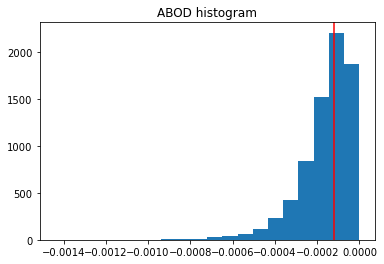

In [97]:
plt.hist(clf_ABOD.decision_scores_, bins=20)
plt.axvline(np.min(clf_ABOD.decision_scores_[np.where(outliers_ABOD==1)]), c='r')
plt.title("ABOD histogram")
plt.show()

**Outliers ABOD**

In [98]:
y_outliers_ABOD = X[outliers_ABOD==1]
y_outliers_ABOD

array([[ 0.28858451, -0.02029417, -0.13290514, ..., -0.84124676,
         0.17994061, -0.05862692],
       [ 0.40347433, -0.0150744 , -0.11816739, ...,  0.43247853,
        -0.55335148, -0.43287564],
       [ 0.01901615, -0.00703736, -0.02833336, ...,  0.20575936,
        -0.53610387, -0.36073577],
       ...,
       [ 0.11234856,  0.01256934, -0.11162457, ..., -0.87771161,
         0.16534253, -0.03606022],
       [ 0.44452109, -0.03103301, -0.04111992, ..., -0.88192001,
         0.13978489, -0.05622144],
       [ 0.32421585, -0.04424116, -0.18456373, ..., -0.89318645,
         0.12404852, -0.05541601]])

In [99]:
len(y_outliers_ABOD)

738

### Top 1% outliers

In [100]:
outlier_abod_list = []

for i in range(0,len(outlier_scores_abod)):
    outlier_abod_list.append((outlier_indexes_abod[i], outlier_scores_abod[i]))
    
outlier_abod_list

[(0, -1.4550911216057932e-05),
 (51, -4.3235063203808474e-05),
 (64, -2.674150908562184e-05),
 (66, -2.073017221592004e-05),
 (67, -1.8680721403996023e-05),
 (68, -3.276110708288269e-05),
 (69, -1.0298287630212076e-05),
 (70, -1.6911017960607798e-05),
 (71, -4.473819342238009e-06),
 (72, -2.073630834917936e-05),
 (78, -2.5715891883491865e-05),
 (86, -0.00011938437293548177),
 (111, -1.8379440586952902e-05),
 (131, -6.529073101083698e-05),
 (134, -1.0981040110813568e-05),
 (135, -3.4046534617851764e-05),
 (136, -2.0267100353229284e-05),
 (137, -1.561565134661832e-05),
 (138, -1.1259078654309094e-05),
 (140, -2.1361279682572885e-05),
 (141, -4.91906379179079e-05),
 (144, -2.017088941578228e-05),
 (145, -3.3112200405725364e-05),
 (155, -3.435530764488863e-05),
 (225, -3.852574695263523e-05),
 (237, -1.6106452685209747e-05),
 (238, -5.975479393305786e-06),
 (271, -3.394524121327065e-05),
 (297, -5.8029826504103536e-05),
 (298, -3.1783884504117705e-05),
 (299, -3.225893637985338e-05),
 (302

In [101]:
def outlier_score(elem):
    return elem[1]
outlier_abod_list = sorted(outlier_abod_list, key=outlier_score, reverse = True)

In [102]:
np.min(clf_ABOD.decision_scores_[np.where(outliers_ABOD==1)])

-0.00011938437293548177

In [103]:
np.max(clf_ABOD.decision_scores_[np.where(outliers_ABOD==1)])

-9.367456198726246e-07

In [104]:
outlier_abod_list[:10]

[(3934, -9.367456198726246e-07),
 (3939, -1.4467973200193825e-06),
 (1868, -2.310909702473165e-06),
 (2451, -2.492792342781064e-06),
 (1271, -2.621530853595749e-06),
 (1724, -3.5548737984906083e-06),
 (2532, -3.7071571835492412e-06),
 (2937, -3.8013357815044903e-06),
 (4828, -3.906863929591603e-06),
 (1274, -4.074211457007061e-06)]

In [105]:
min([i[1] for i in outlier_abod_list])

-0.00011938437293548177

In [106]:
max([i[1] for i in outlier_abod_list])

-9.367456198726246e-07

**Top 1%**

In [107]:
top1perc = int(math.ceil(len(y_outliers_ABOD))*0.01)

top_outliers_ABOD = outlier_abod_list[:top1perc]
len(top_outliers_ABOD)

7

In [108]:
top_outliers_ABOD

[(3934, -9.367456198726246e-07),
 (3939, -1.4467973200193825e-06),
 (1868, -2.310909702473165e-06),
 (2451, -2.492792342781064e-06),
 (1271, -2.621530853595749e-06),
 (1724, -3.5548737984906083e-06),
 (2532, -3.7071571835492412e-06)]

In [109]:
indexes_list_ABOD = [i[0] for i in top_outliers_ABOD] #retrieve index of outliers
indexes_list_ABOD

[3934, 3939, 1868, 2451, 1271, 1724, 2532]

In [110]:
df_ABOD_outliers = df.iloc[indexes_list_ABOD]

In [111]:
df_ABOD_outliers

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
3934,0.028502,-0.012144,-0.097018,0.793422,0.916238,0.730133,0.761451,0.865956,0.681404,0.683437,...,0.893470,0.536252,0.812812,0.067803,-0.723711,0.228629,0.161748,19,3,WALKING_DOWNSTAIRS
3939,0.114180,-0.042243,-0.118167,1.000000,0.753928,0.217305,1.000000,0.722617,0.179957,1.000000,...,0.586616,0.818511,-0.863211,-0.255721,-0.668652,0.228409,0.212093,19,3,WALKING_DOWNSTAIRS
1868,0.178108,-0.047744,-0.166051,0.061817,0.403292,0.461668,-0.058324,0.368466,0.236215,0.492840,...,0.269094,-0.769676,0.949738,0.027506,-0.708379,0.172319,0.213071,8,3,WALKING_DOWNSTAIRS
2451,-1.000000,0.177522,0.543939,-0.100786,-0.126211,0.359538,-0.092218,-0.149869,0.530467,-0.821282,...,-0.061649,0.129772,-0.296755,-0.087100,-0.043034,-0.220034,-0.530436,14,6,LAYING
1271,0.432575,-0.055122,-0.112329,0.427010,0.643319,-0.132942,0.362040,0.585983,-0.145362,0.663032,...,-0.758140,-0.611979,0.049916,-0.946622,-0.816344,0.224268,0.002807,6,3,WALKING_DOWNSTAIRS
1724,0.263968,-0.002606,-0.226908,0.148883,0.708942,0.191623,0.055415,0.621585,0.155250,0.408465,...,0.078442,-0.489302,0.969253,-0.571147,-0.794670,0.240019,0.014224,8,3,WALKING_DOWNSTAIRS
2532,0.176658,-0.038535,-0.042979,-0.320417,0.517275,1.000000,-0.381541,0.530447,1.000000,-0.369909,...,0.579724,-0.628818,0.888889,0.450867,-0.261964,0.311073,0.481737,14,2,WALKING_UPSTAIRS


In [112]:
#retrieve id of outliers
outliers_id_abod = list(df_ABOD_outliers.index)
outliers_id_abod[:10]

[3934, 3939, 1868, 2451, 1271, 1724, 2532]

In [113]:
len(outliers_id_abod)

7

In [114]:
top_outliers_ABOD[:5]

[(3934, -9.367456198726246e-07),
 (3939, -1.4467973200193825e-06),
 (1868, -2.310909702473165e-06),
 (2451, -2.492792342781064e-06),
 (1271, -2.621530853595749e-06)]

In [115]:
top_outliers_ABOD_id = []

for i, val in top_outliers_ABOD:
    top_outliers_ABOD_id.append((df.iloc[i].name, val))

print("id with ABOD score of outlierness")
top_outliers_ABOD_id[:10]

id with ABOD score of outlierness


[(3934, -9.367456198726246e-07),
 (3939, -1.4467973200193825e-06),
 (1868, -2.310909702473165e-06),
 (2451, -2.492792342781064e-06),
 (1271, -2.621530853595749e-06),
 (1724, -3.5548737984906083e-06),
 (2532, -3.7071571835492412e-06)]

In [116]:
len(top_outliers_ABOD_id)

7

## ABOD n_neighbors = 5

In [117]:
clf_ABOD_2 = ABOD(n_neighbors=5)
clf_ABOD_2.fit(X)

ABOD(contamination=0.1, method='fast', n_neighbors=5)

**Decision_scores_**
**The outlier scores of the training data.** The higher, the more abnormal.
- Outliers tend to have higher scores. This value is available once the detector is fitted

In [118]:
clf_ABOD_2.decision_scores_

array([-1.72927883e-05, -1.59284556e-04, -2.67999582e-04, ...,
       -1.75294243e-04, -1.03815217e-04, -5.41070915e-05])

In [119]:
outliers_ABOD_2 = clf_ABOD_2.predict(X)
np.unique(outliers_ABOD_2, return_counts=True)

(array([0, 1]), array([6263, 1089], dtype=int64))

In [120]:
np.where(outliers_ABOD_2==1)

(array([   0,   53,   60, ..., 7321, 7326, 7336], dtype=int64),)

In [121]:
outlier_indexes_abod_2 = np.where(outliers_ABOD_2==1)[0]
len(outlier_indexes_abod_2)

1089

In [122]:
outlier_scores_abod_2 = clf_ABOD_2.decision_scores_[outlier_indexes_abod_2]
len(outlier_scores_abod_2)

1089

In [123]:
np.min(outlier_scores_abod_2)

-0.0003925204543515618

In [124]:
np.max(outlier_scores_abod_2)

-4.445102603358903e-07

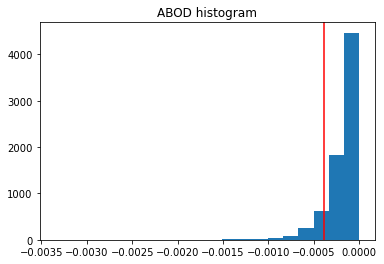

In [125]:
plt.hist(clf_ABOD_2.decision_scores_, bins=20)
plt.axvline(np.min(clf_ABOD_2.decision_scores_[np.where(outliers_ABOD_2==1)]), c='r')
plt.title("ABOD histogram")
plt.show()

**Outliers ABOD**

In [126]:
y_outliers_ABOD_2 = X[outliers_ABOD_2==1]
len(y_outliers_ABOD_2)

1089

### Top 1% outliers

In [127]:
outlier_abod_list_2 = []

for i in range(0,len(outlier_scores_abod_2)):
    outlier_abod_list_2.append((outlier_indexes_abod_2[i], outlier_scores_abod_2[i]))
    
outlier_abod_list_2

[(0, -1.7292788289940003e-05),
 (53, -0.0001738379807176514),
 (60, -7.52978620781864e-05),
 (66, -1.52105469980136e-05),
 (67, -7.708781205078809e-06),
 (68, -3.01708540763466e-05),
 (69, -1.0972388973532253e-05),
 (70, -2.1726614900959074e-05),
 (71, -6.249255877852022e-06),
 (72, -1.7308457200729096e-05),
 (80, -2.5899472606599543e-05),
 (83, -2.5188726643225215e-05),
 (100, -2.0428308058903427e-05),
 (101, -4.753773381177674e-05),
 (107, -3.929750357352479e-05),
 (111, -2.3989230815617406e-05),
 (117, -0.0001666229081620897),
 (130, -3.337323682645205e-05),
 (131, -2.417649896026508e-05),
 (134, -9.176262934678165e-06),
 (136, -1.1752346318565427e-05),
 (137, -1.4213164042804423e-05),
 (138, -1.5978903870817695e-05),
 (139, -1.9055833468741994e-05),
 (140, -2.4238509599953192e-05),
 (143, -7.875634355652964e-05),
 (144, -9.882357385189328e-06),
 (174, -6.0039553251316585e-05),
 (175, -8.495404678903708e-05),
 (217, -4.8175274136357635e-05),
 (225, -2.1364282260587984e-05),
 (231, -

In [128]:
def outlier_score(elem):
    return elem[1]
outlier_abod_list_2 = sorted(outlier_abod_list_2, key=outlier_score, reverse = True)

In [129]:
np.min(clf_ABOD_2.decision_scores_[np.where(outliers_ABOD_2==1)])

-0.0003925204543515618

In [130]:
np.max(clf_ABOD_2.decision_scores_[np.where(outliers_ABOD_2==1)])

-4.445102603358903e-07

In [131]:
outlier_abod_list_2[:10]

[(1904, -4.445102603358903e-07),
 (3939, -7.170425773733254e-07),
 (3934, -1.3113351349534404e-06),
 (3938, -2.097327764785458e-06),
 (875, -2.2893145071416405e-06),
 (2352, -2.3078085450367775e-06),
 (5031, -2.3804692059019676e-06),
 (3915, -2.860853666252518e-06),
 (2451, -2.9260712911303854e-06),
 (4867, -2.96730880377975e-06)]

In [132]:
min([i[1] for i in outlier_abod_list_2])

-0.0003925204543515618

In [133]:
max([i[1] for i in outlier_abod_list_2])

-4.445102603358903e-07

**Top 1%**

In [134]:
top1perc = int(math.ceil(len(y_outliers_ABOD_2))*0.01)

top_outliers_ABOD_2 = outlier_abod_list_2[:top1perc]
len(top_outliers_ABOD_2)

10

In [135]:
indexes_list_ABOD_2 = [i[0] for i in top_outliers_ABOD_2] #retrieve index of outliers

In [136]:
df_ABOD_outliers_2 = df.iloc[indexes_list_ABOD_2]

In [137]:
df_ABOD_outliers_2

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
1904,0.273039,-0.033770,-0.102502,-0.963494,-0.905461,-0.958686,-0.982357,-0.926281,-0.967236,-0.819511,...,-0.049379,-0.085283,0.613315,-0.348253,-0.742238,0.200055,-0.133881,11,5,STANDING
3939,0.114180,-0.042243,-0.118167,1.000000,0.753928,0.217305,1.000000,0.722617,0.179957,1.000000,...,0.586616,0.818511,-0.863211,-0.255721,-0.668652,0.228409,0.212093,19,3,WALKING_DOWNSTAIRS
3934,0.028502,-0.012144,-0.097018,0.793422,0.916238,0.730133,0.761451,0.865956,0.681404,0.683437,...,0.893470,0.536252,0.812812,0.067803,-0.723711,0.228629,0.161748,19,3,WALKING_DOWNSTAIRS
3938,-0.161088,-0.028160,-0.209931,0.817104,0.873037,0.127390,0.734566,0.845695,0.111837,0.803192,...,0.621322,-0.820087,0.351063,0.193917,-0.729349,0.208647,0.174249,19,3,WALKING_DOWNSTAIRS
875,0.237868,0.069679,-0.069621,-0.971624,-0.811786,-0.925904,-0.976328,-0.791251,-0.929942,-0.923921,...,-0.013513,-0.285302,-0.201693,-0.622191,-0.774345,-0.020470,-0.091494,5,4,SITTING
2352,0.346694,-0.064973,-0.155830,0.105998,0.400009,0.394327,-0.056763,0.292261,0.341781,0.643538,...,-0.539461,-0.716979,-0.614701,-0.284026,-0.549139,0.275628,0.278635,14,3,WALKING_DOWNSTAIRS
5031,0.445497,-0.038743,-0.022479,0.312010,0.393009,0.455654,0.227160,0.343693,0.379090,0.589661,...,-0.399620,-0.301910,0.913745,-0.995100,-0.727216,0.162559,0.202732,23,3,WALKING_DOWNSTAIRS
3915,0.200659,-0.086655,-0.170024,0.061021,0.289417,0.186073,-0.114068,0.210441,0.101854,0.518618,...,0.101909,-0.319113,-0.966249,-0.968393,-0.779733,0.208059,0.127136,19,1,WALKING
2451,-1.000000,0.177522,0.543939,-0.100786,-0.126211,0.359538,-0.092218,-0.149869,0.530467,-0.821282,...,-0.061649,0.129772,-0.296755,-0.087100,-0.043034,-0.220034,-0.530436,14,6,LAYING
4867,0.113550,0.034000,-0.078918,-0.064953,0.102599,0.103434,-0.202318,0.151325,0.004543,0.165346,...,0.653298,0.264156,-0.814311,0.393014,-0.789695,0.163405,0.153595,23,3,WALKING_DOWNSTAIRS


In [138]:
#retrieve  id of outliers
outliers_id_abod_2 = list(df_ABOD_outliers_2.index)
outliers_id_abod_2[:10]

[1904, 3939, 3934, 3938, 875, 2352, 5031, 3915, 2451, 4867]

In [139]:
len(outliers_id_abod_2)

10

In [140]:
top_outliers_ABOD_2[:5]

[(1904, -4.445102603358903e-07),
 (3939, -7.170425773733254e-07),
 (3934, -1.3113351349534404e-06),
 (3938, -2.097327764785458e-06),
 (875, -2.2893145071416405e-06)]

In [141]:
top_outliers_ABOD_id_2 = []

for i, val in top_outliers_ABOD_2:
    top_outliers_ABOD_id_2.append((df.iloc[i].name, val))

print("id with ABOD score of outlierness")
top_outliers_ABOD_id_2[:10]

id with ABOD score of outlierness


[(1904, -4.445102603358903e-07),
 (3939, -7.170425773733254e-07),
 (3934, -1.3113351349534404e-06),
 (3938, -2.097327764785458e-06),
 (875, -2.2893145071416405e-06),
 (2352, -2.3078085450367775e-06),
 (5031, -2.3804692059019676e-06),
 (3915, -2.860853666252518e-06),
 (2451, -2.9260712911303854e-06),
 (4867, -2.96730880377975e-06)]

In [142]:
len(top_outliers_ABOD_id_2)

10

# Distance based (KNN)

## KNN

In [143]:
clf_KNN = KNN(n_neighbors=86)
clf_KNN.fit(X)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=86, p=2,
  radius=1.0)

**Decision_scores_**

**The outlier scores of the training data.** The higher, the more abnormal. Outliers tend to have higher scores. This value is available once the detector is fitted.

In [144]:
clf_KNN.decision_scores_

array([5.41240703, 3.57787976, 3.35489902, ..., 5.09905614, 5.15792921,
       4.68287316])

**Decision function**

In [145]:
anomlay_score = clf_KNN.decision_function(X)
anomlay_score

array([5.4077712 , 3.57771789, 3.35240149, ..., 5.08950355, 5.15554062,
       4.67199846])

**Predict**

In [146]:
outliers_KNN = clf_KNN.predict(X)
np.unique(outliers_KNN, return_counts=True)

(array([0, 1]), array([6622,  730], dtype=int64))

In [147]:
outlier_indexes_knn = np.where(outliers_KNN==1)[0]
outlier_indexes_knn

array([  27,   30,   31,   32,   64,   66,   67,   69,   70,   71,   72,
         73,  134,  136,  137,  138,  140,  237,  238,  240,  241,  245,
        246,  247,  299,  344,  346,  347,  378,  384,  385,  386,  481,
        482,  483,  486,  487,  552,  564,  565,  578,  579,  594,  657,
        688,  690,  703,  716,  739,  753,  802,  818,  819,  847,  861,
        870,  896,  955, 1040, 1041, 1049, 1050, 1052, 1062, 1063, 1109,
       1110, 1111, 1112, 1115, 1118, 1119, 1121, 1122, 1123, 1126, 1170,
       1183, 1194, 1209, 1210, 1211, 1223, 1242, 1243, 1251, 1257, 1258,
       1259, 1263, 1264, 1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273,
       1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284,
       1285, 1286, 1287, 1288, 1289, 1301, 1304, 1305, 1308, 1309, 1310,
       1311, 1312, 1343, 1355, 1369, 1370, 1383, 1413, 1420, 1421, 1422,
       1423, 1424, 1425, 1429, 1432, 1441, 1442, 1444, 1445, 1446, 1447,
       1448, 1449, 1488, 1501, 1513, 1514, 1523, 15

In [148]:
len(outlier_indexes_knn)

730

In [149]:
outlier_scores_knn = clf_KNN.decision_scores_[outlier_indexes_knn]

In [150]:
outlier_scores_knn

array([ 6.66349021,  6.34843531,  6.33150161,  6.41870333,  6.35033555,
        7.25885594,  7.39540479,  6.88206428,  8.32395381,  9.02586166,
        7.39466195,  5.80819708,  6.87403346,  6.16103029,  6.21565595,
        6.07851574,  5.80548652,  7.92193298,  8.8627316 ,  6.19181343,
        5.89667342,  5.93238516,  6.72232856,  6.10460115,  6.10880537,
        5.83924418,  6.17375736,  6.15665553,  6.20408563,  6.03771574,
        6.15013051,  6.07457007,  6.99302964,  5.81790274,  5.93638257,
        6.15465745,  7.27166065,  6.04004619,  6.49879776,  5.94484154,
        5.83426546,  5.73233797,  6.32609652,  5.78215397,  6.26206775,
        5.68453949,  6.35139408,  6.47696276,  5.68694498,  6.23745385,
        5.81313691,  6.21268903,  6.23821749,  6.38641807,  5.98639633,
        5.86848267,  5.87933156,  5.70815792,  5.76068827,  5.68480601,
        5.8507193 ,  5.95510136,  5.93284282,  8.47273911,  5.79531464,
        5.76784713,  7.61065857,  7.79192638,  6.08265686,  6.22

In [151]:
len(outlier_scores_knn)

730

In [152]:
np.min(outlier_scores_knn)

5.680873680953621

In [153]:
np.max(outlier_scores_knn)

16.15170609896186

In [154]:
np.max(anomlay_score[np.where(outliers_KNN==1)])

16.145818475703795

In [155]:
np.mean(anomlay_score[np.where(outliers_KNN==1)])

6.629166885135887

In [156]:
np.mean(anomlay_score[np.where(outliers_KNN==0)])

4.345949476671436

In [157]:
np.mean(clf_KNN.decision_scores_[np.where(outliers_KNN==1)])

6.635609649859875

In [158]:
np.mean(clf_KNN.decision_scores_[np.where(outliers_KNN==0)])

4.3499534341039485

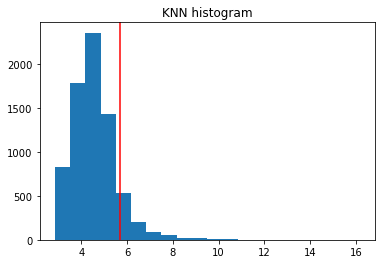

In [159]:
plt.hist(clf_KNN.decision_scores_, bins=20)
plt.axvline(np.min(clf_KNN.decision_scores_[np.where(outliers_KNN==1)]), c='r')
plt.title("KNN histogram")
plt.show()

## Top 1% outliers

In [160]:
outlier_knn_list = []

for i in range(0,len(outlier_scores_knn)):
    outlier_knn_list.append((outlier_indexes_knn[i], outlier_scores_knn[i]))
    
outlier_knn_list[:10]

[(27, 6.663490211238669),
 (30, 6.348435305281878),
 (31, 6.331501607132842),
 (32, 6.41870332754816),
 (64, 6.350335553257467),
 (66, 7.258855938169568),
 (67, 7.395404791889644),
 (69, 6.882064282837135),
 (70, 8.323953812471036),
 (71, 9.025861658063466)]

In [161]:
outlier_knn_list = sorted(outlier_knn_list, key=outlier_score, reverse = True)

In [162]:
np.min(clf_KNN.decision_scores_[np.where(outliers_KNN==1)])

5.680873680953621

In [163]:
np.max(clf_KNN.decision_scores_[np.where(outliers_KNN==1)])

16.15170609896186

In [164]:
outlier_knn_list[:10]

[(3934, 16.15170609896186),
 (3935, 15.825760672756722),
 (3939, 12.692104075103185),
 (3936, 11.257346211948656),
 (3930, 11.063410270190156),
 (2451, 10.944315382800584),
 (3929, 10.496661250562651),
 (3938, 10.315761201496578),
 (3764, 10.197884729624953),
 (3955, 10.17923584632775)]

### Top 1%

In [165]:
top1perc = int(math.ceil(len(outlier_indexes_knn))*0.01)

In [166]:
top_outliers_knn = outlier_knn_list[:top1perc]

In [167]:
indexes_list_knn = [i[0] for i in top_outliers_knn] #retrieve index of outliers

In [168]:
df_knn_outliers = df.iloc[indexes_list_knn]

In [169]:
df_knn_outliers

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
3934,0.028502,-0.012144,-0.097018,0.793422,0.916238,0.730133,0.761451,0.865956,0.681404,0.683437,...,0.893470,0.536252,0.812812,0.067803,-0.723711,0.228629,0.161748,19,3,WALKING_DOWNSTAIRS
3935,0.418868,-0.000011,-0.103503,0.876942,0.729609,0.551648,0.852822,0.644811,0.542567,0.907994,...,-0.638834,-0.558603,0.965174,0.056948,-0.708794,0.239055,0.165807,19,3,WALKING_DOWNSTAIRS
3939,0.114180,-0.042243,-0.118167,1.000000,0.753928,0.217305,1.000000,0.722617,0.179957,1.000000,...,0.586616,0.818511,-0.863211,-0.255721,-0.668652,0.228409,0.212093,19,3,WALKING_DOWNSTAIRS
3936,0.617597,-0.008101,-0.065791,0.786675,0.419288,0.388652,0.780326,0.377150,0.368848,0.907994,...,-0.700399,-0.516792,0.939166,-0.241794,-0.726711,0.226650,0.160792,19,3,WALKING_DOWNSTAIRS
3930,0.309998,0.041904,-0.105954,0.657785,0.562952,0.398943,0.634664,0.464848,0.261347,0.646970,...,-0.002583,-0.861994,0.908530,-0.629753,-0.710140,0.228412,0.174910,19,3,WALKING_DOWNSTAIRS
2451,-1.000000,0.177522,0.543939,-0.100786,-0.126211,0.359538,-0.092218,-0.149869,0.530467,-0.821282,...,-0.061649,0.129772,-0.296755,-0.087100,-0.043034,-0.220034,-0.530436,14,6,LAYING
3929,0.326223,-0.030333,-0.192155,0.732704,0.473368,0.465160,0.743918,0.418036,0.299362,0.740891,...,-0.354839,-0.189736,0.869019,0.237295,-0.730075,0.229188,0.154897,19,3,WALKING_DOWNSTAIRS


In [170]:
#retrieve track id of outliers
outliers_id_knn = list(df_knn_outliers.index)
outliers_id_knn[:10]

[3934, 3935, 3939, 3936, 3930, 2451, 3929]

In [171]:
len(outliers_id_knn)

7

In [172]:
np.min(clf_KNN.decision_scores_[np.where(outliers_KNN==1)])

5.680873680953621

In [173]:
top_outliers_knn[:5]

[(3934, 16.15170609896186),
 (3935, 15.825760672756722),
 (3939, 12.692104075103185),
 (3936, 11.257346211948656),
 (3930, 11.063410270190156)]

In [174]:
top_outliers_knn_id = []

for i, val in top_outliers_knn:
    top_outliers_knn_id.append((df.iloc[i].name, val))

print("id with knn score of outlierness")
top_outliers_knn_id[:10]

id with knn score of outlierness


[(3934, 16.15170609896186),
 (3935, 15.825760672756722),
 (3939, 12.692104075103185),
 (3936, 11.257346211948656),
 (3930, 11.063410270190156),
 (2451, 10.944315382800584),
 (3929, 10.496661250562651)]

In [175]:
len(top_outliers_knn_id)

7

## KNN 10 neighbors

In [176]:
clf_KNN_2 = KNN(n_neighbors=10)
clf_KNN_2.fit(X)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=10, p=2,
  radius=1.0)

**Decision_scores_**

**The outlier scores of the training data.** The higher, the more abnormal. Outliers tend to have higher scores. This value is available once the detector is fitted.

In [177]:
clf_KNN_2.decision_scores_

array([5.08704577, 3.1812399 , 3.01773289, ..., 4.0962675 , 4.01463561,
       3.86841841])

**Decision function**

In [178]:
anomlay_score_2 = clf_KNN_2.decision_function(X)
anomlay_score_2

array([5.07528021, 3.16507947, 3.01616247, ..., 4.00681811, 3.8253595 ,
       3.72084343])

**Predict**

In [179]:
outliers_KNN_2 = clf_KNN_2.predict(X)
np.unique(outliers_KNN_2, return_counts=True)

(array([0, 1]), array([6663,  689], dtype=int64))

In [180]:
np.where(outliers_KNN_2 == 1)

(array([   0,   27,   30,   31,   32,   64,   66,   67,   69,   70,   71,
          72,   73,   74,  133,  134,  135,  136,  137,  138,  140,  144,
         176,  225,  237,  238,  240,  245,  246,  247,  298,  299,  331,
         335,  344,  346,  347,  378,  384,  385,  388,  481,  482,  483,
         486,  487,  500,  536,  552,  564,  565,  578,  579,  594,  657,
         688,  690,  703,  716,  739,  740,  753,  797,  802,  803,  816,
         817,  818,  819,  847,  861,  870,  871,  874,  886,  896,  933,
         953,  955,  956,  957,  959,  962, 1020, 1039, 1040, 1041, 1049,
        1050, 1052, 1062, 1085, 1109, 1110, 1111, 1112, 1115, 1116, 1117,
        1118, 1119, 1122, 1123, 1126, 1127, 1129, 1143, 1156, 1170, 1183,
        1194, 1209, 1210, 1211, 1223, 1243, 1255, 1257, 1266, 1267, 1268,
        1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279,
        1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1305,
        1308, 1309, 1311, 1312, 1343, 

In [181]:
outlier_indexes_knn_2 = np.where(outliers_KNN_2==1)[0]
outlier_indexes_knn_2

array([   0,   27,   30,   31,   32,   64,   66,   67,   69,   70,   71,
         72,   73,   74,  133,  134,  135,  136,  137,  138,  140,  144,
        176,  225,  237,  238,  240,  245,  246,  247,  298,  299,  331,
        335,  344,  346,  347,  378,  384,  385,  388,  481,  482,  483,
        486,  487,  500,  536,  552,  564,  565,  578,  579,  594,  657,
        688,  690,  703,  716,  739,  740,  753,  797,  802,  803,  816,
        817,  818,  819,  847,  861,  870,  871,  874,  886,  896,  933,
        953,  955,  956,  957,  959,  962, 1020, 1039, 1040, 1041, 1049,
       1050, 1052, 1062, 1085, 1109, 1110, 1111, 1112, 1115, 1116, 1117,
       1118, 1119, 1122, 1123, 1126, 1127, 1129, 1143, 1156, 1170, 1183,
       1194, 1209, 1210, 1211, 1223, 1243, 1255, 1257, 1266, 1267, 1268,
       1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279,
       1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1305,
       1308, 1309, 1311, 1312, 1343, 1355, 1369, 13

In [182]:
len(outlier_indexes_knn_2)

689

In [183]:
outlier_scores_knn_2 = clf_KNN_2.decision_scores_[outlier_indexes_knn_2]

In [184]:
outlier_scores_knn_2

array([ 5.08704577,  4.86249944,  5.60774685,  5.79308845,  5.02159149,
        5.51416545,  6.62726551,  6.57941468,  5.64233537,  8.00717694,
        8.67501226,  6.19821352,  4.99105761,  4.93673481,  4.80943047,
        5.95874565,  4.83866798,  5.25516503,  5.4766997 ,  5.39588078,
        5.00011731,  4.85755696,  4.87507162,  4.87627027,  7.4388359 ,
        7.91452557,  5.11264624,  4.97954485,  5.90093532,  5.13380563,
        4.88541619,  5.22601348,  4.85886747,  4.82476241,  5.01140741,
        5.1592871 ,  5.25104437,  5.4495603 ,  5.04431748,  4.93783664,
        4.89587896,  6.16430883,  5.17903604,  5.21564206,  5.53313852,
        5.93772723,  5.06381567,  4.91166992,  5.1207045 ,  6.01618862,
        5.55640999,  4.91939704,  4.971388  ,  5.61753465,  5.14279617,
        5.29091977,  4.87217858,  5.62898156,  5.6290711 ,  4.85430751,
        5.04525833,  5.06980849,  4.76991455,  5.14796435,  4.93340576,
        4.78550505,  4.85799124,  5.02320958,  5.1986584 ,  5.58

In [185]:
len(outlier_scores_knn_2)

689

In [186]:
np.min(outlier_scores_knn_2)

4.758878322881909

In [187]:
np.max(outlier_scores_knn_2)

12.049922377589699

In [188]:
np.max(anomlay_score[np.where(outliers_KNN_2==1)])

16.145818475703795

In [189]:
np.mean(anomlay_score[np.where(outliers_KNN_2==1)])

6.513899355529239

In [190]:
np.mean(anomlay_score[np.where(outliers_KNN_2==0)])

4.371918445851388

In [191]:
np.mean(clf_KNN_2.decision_scores_[np.where(outliers_KNN_2==1)])

5.478838367207493

In [192]:
np.mean(clf_KNN_2.decision_scores_[np.where(outliers_KNN_2==0)])

3.639951344775616

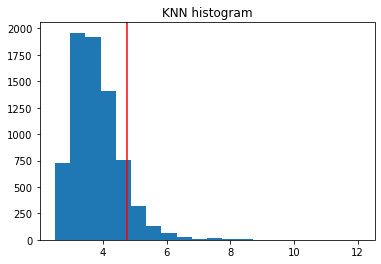

In [193]:
plt.hist(clf_KNN_2.decision_scores_, bins=20)
plt.axvline(np.min(clf_KNN_2.decision_scores_[np.where(outliers_KNN_2==1)]), c='r')
plt.title("KNN histogram")
plt.show()

## Top 1% outliers

In [194]:
outlier_knn_list_2 = []

for i in range(0,len(outlier_scores_knn_2)):
    outlier_knn_list_2.append((outlier_indexes_knn_2[i], outlier_scores_knn_2[i]))
    
outlier_knn_list_2[:10]

[(0, 5.087045766839731),
 (27, 4.862499438998021),
 (30, 5.607746852669076),
 (31, 5.793088446783539),
 (32, 5.0215914929057766),
 (64, 5.5141654549526224),
 (66, 6.627265512302147),
 (67, 6.579414684073173),
 (69, 5.642335368780815),
 (70, 8.007176940808147)]

In [195]:
outlier_knn_list_2 = sorted(outlier_knn_list_2, key=outlier_score, reverse = True)

In [196]:
np.min(clf_KNN_2.decision_scores_[np.where(outliers_KNN_2==1)])

4.758878322881909

In [197]:
np.max(clf_KNN_2.decision_scores_[np.where(outliers_KNN_2==1)])

12.049922377589699

In [198]:
outlier_knn_list_2[:10]

[(3934, 12.049922377589699),
 (3935, 11.597780873865778),
 (3939, 9.356958720432093),
 (2451, 9.255347530810067),
 (71, 8.675012258470913),
 (2511, 8.481740806718642),
 (2440, 8.309038821731201),
 (3930, 8.192229412394992),
 (3928, 8.172177219359984),
 (1209, 8.156338865180306)]

### Top 1%

In [199]:
top_outliers_knn_2 = outlier_knn_list_2[:top1perc]

In [200]:
indexes_list_knn_2 = [i[0] for i in top_outliers_knn_2] #retrieve index of outliers

In [201]:
df_knn_outliers_2 = df.iloc[indexes_list_knn_2]

In [202]:
df_knn_outliers_2

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
3934,0.028502,-0.012144,-0.097018,0.793422,0.916238,0.730133,0.761451,0.865956,0.681404,0.683437,...,0.893470,0.536252,0.812812,0.067803,-0.723711,0.228629,0.161748,19,3,WALKING_DOWNSTAIRS
3935,0.418868,-0.000011,-0.103503,0.876942,0.729609,0.551648,0.852822,0.644811,0.542567,0.907994,...,-0.638834,-0.558603,0.965174,0.056948,-0.708794,0.239055,0.165807,19,3,WALKING_DOWNSTAIRS
3939,0.114180,-0.042243,-0.118167,1.000000,0.753928,0.217305,1.000000,0.722617,0.179957,1.000000,...,0.586616,0.818511,-0.863211,-0.255721,-0.668652,0.228409,0.212093,19,3,WALKING_DOWNSTAIRS
2451,-1.000000,0.177522,0.543939,-0.100786,-0.126211,0.359538,-0.092218,-0.149869,0.530467,-0.821282,...,-0.061649,0.129772,-0.296755,-0.087100,-0.043034,-0.220034,-0.530436,14,6,LAYING
71,-0.277066,-0.684097,0.346658,-0.596410,0.024683,-0.160404,-0.631819,-0.068857,-0.235160,-0.866296,...,0.123108,0.432540,-0.083446,0.025648,0.668284,-0.336641,-0.672685,1,6,LAYING
2511,0.283672,-0.007501,-0.172356,0.161401,0.682863,0.888599,-0.018159,0.431337,0.746872,0.676753,...,-0.264412,-0.693300,0.914237,-0.140815,-0.496822,0.253791,0.336026,14,3,WALKING_DOWNSTAIRS
2440,-0.872395,0.154608,0.330753,-0.060639,-0.306884,0.068578,-0.104270,-0.244592,0.147420,-0.835074,...,-0.066795,0.223959,-0.329403,-0.076789,0.074088,-0.235313,-0.593913,14,6,LAYING


In [203]:
#retrieve id of outliers
outliers_track_id_knn_2 = list(df_knn_outliers_2.index)
outliers_track_id_knn_2[:10]

[3934, 3935, 3939, 2451, 71, 2511, 2440]

In [204]:
len(outliers_track_id_knn_2)

7

In [205]:
np.min(clf_KNN_2.decision_scores_[np.where(outliers_KNN_2==1)])

4.758878322881909

In [206]:
top_outliers_knn_2[:5]

[(3934, 12.049922377589699),
 (3935, 11.597780873865778),
 (3939, 9.356958720432093),
 (2451, 9.255347530810067),
 (71, 8.675012258470913)]

In [207]:
top_outliers_knn_track_id_2 = []

for i, val in top_outliers_knn_2:
    top_outliers_knn_track_id_2.append((df.iloc[i].name, val))

print("Track id with knn score of outlierness")
top_outliers_knn_track_id_2[:10]

Track id with knn score of outlierness


[(3934, 12.049922377589699),
 (3935, 11.597780873865778),
 (3939, 9.356958720432093),
 (2451, 9.255347530810067),
 (71, 8.675012258470913),
 (2511, 8.481740806718642),
 (2440, 8.309038821731201)]

In [208]:
len(top_outliers_knn_track_id_2)

7

# Interctions of top 1%

In [209]:
set_LOF = set([i[0] for i in top_outliers_lof_id])
set_KNN = set([i[0] for i in top_outliers_knn_id])
set_ABOD = set([i[0] for i in top_outliers_ABOD_id]) #10
set_ABOD2 = set([i[0] for i in top_outliers_ABOD_id_2]) #5

set_DBSCAN = set(outliers_dbscan)

In [210]:
sets = [set_LOF, set_KNN, set_ABOD, set_ABOD2, set_DBSCAN]

In [211]:
sets_names = ['LOF', 'KNN', 'ABOD_10N', 'ABOD_5N', 'DBSCAN']

In [212]:
tab_intersection_top_1perc_outliers = []
headers_outliers = ['Methods', 'Intersection']
print("Intersections of top 1%\n")

for i in range(0, len(sets)):
    for j in range(i+1, len(sets)):
        methods = ' - '.join(map(str, (sets_names[i], sets_names[j])))
        intersection = len(sets[i].intersection(sets[j]))
        print("{0:20} {1}".format(methods, intersection))
        if intersection != 0:
            tab_intersection_top_1perc_outliers.append((methods, intersection))

Intersections of top 1%

LOF - KNN            0
LOF - ABOD_10N       0
LOF - ABOD_5N        0
LOF - DBSCAN         1
KNN - ABOD_10N       3
KNN - ABOD_5N        3
KNN - DBSCAN         7
ABOD_10N - ABOD_5N   3
ABOD_10N - DBSCAN    7
ABOD_5N - DBSCAN     10


In [213]:
print(tabulate(tab_intersection_top_1perc_outliers, headers_outliers, colalign=('left', 'center'), tablefmt='simple'))


Methods              Intersection
------------------  --------------
LOF - DBSCAN              1
KNN - ABOD_10N            3
KNN - ABOD_5N             3
KNN - DBSCAN              7
ABOD_10N - ABOD_5N        3
ABOD_10N - DBSCAN         7
ABOD_5N - DBSCAN          10


In [214]:
print(tabulate(tab_intersection_top_1perc_outliers, headers_outliers, colalign=('left', 'center'), tablefmt='latex'))


\begin{tabular}{lc}
\hline
 Methods            &  Intersection  \\
\hline
 LOF - DBSCAN       &       1        \\
 KNN - ABOD\_10N     &       3        \\
 KNN - ABOD\_5N      &       3        \\
 KNN - DBSCAN       &       7        \\
 ABOD\_10N - ABOD\_5N &       3        \\
 ABOD\_10N - DBSCAN  &       7        \\
 ABOD\_5N - DBSCAN   &       10       \\
\hline
\end{tabular}


### Intersections of top 10

In [215]:
set_LOF_10 = set([i[0] for i in top_outliers_lof_id[:10]])
set_KNN_10 = set([i[0] for i in top_outliers_knn_id[:10]])
set_ABOD_10 = set([i[0] for i in top_outliers_ABOD_id[:10]])
set_ABOD2_10 = set([i[0] for i in top_outliers_ABOD_id_2[:10]])

In [216]:
sets_10 = [set_LOF_10, set_KNN_10, set_ABOD_10, set_ABOD2_10, set_DBSCAN]

In [217]:
sets_names_10 = [':10_LOF', ':10_KNN', ':10_ABOD_10N', 
                 ':10_ABOD_5N', 'DBSCAN']

In [218]:
tab_intersection_top_10_outliers = []
headers_outliers = ['Methods', 'Intersection']
print("Intersections of top 10\n")

for i in range(0, len(sets_10)):
    for j in range(i+1, len(sets_10)):
        methods = ' - '.join(map(str, (sets_names_10[i], sets_names_10[j])))
        intersection = len(sets_10[i].intersection(sets_10[j]))
        print("{0:35} {1}".format(methods, intersection))
        if intersection != 0:
            tab_intersection_top_10_outliers.append((methods, intersection))

Intersections of top 10

:10_LOF - :10_KNN                   0
:10_LOF - :10_ABOD_10N              0
:10_LOF - :10_ABOD_5N               0
:10_LOF - DBSCAN                    1
:10_KNN - :10_ABOD_10N              3
:10_KNN - :10_ABOD_5N               3
:10_KNN - DBSCAN                    7
:10_ABOD_10N - :10_ABOD_5N          3
:10_ABOD_10N - DBSCAN               7
:10_ABOD_5N - DBSCAN                10


In [219]:
print(tabulate(tab_intersection_top_10_outliers, headers_outliers, colalign=('left', 'center'), tablefmt='simple'))


Methods                      Intersection
--------------------------  --------------
:10_LOF - DBSCAN                  1
:10_KNN - :10_ABOD_10N            3
:10_KNN - :10_ABOD_5N             3
:10_KNN - DBSCAN                  7
:10_ABOD_10N - :10_ABOD_5N        3
:10_ABOD_10N - DBSCAN             7
:10_ABOD_5N - DBSCAN              10


In [220]:
print(tabulate(tab_intersection_top_10_outliers, headers_outliers, colalign=('left', 'center'), tablefmt='latex'))


\begin{tabular}{lc}
\hline
 Methods                    &  Intersection  \\
\hline
 :10\_LOF - DBSCAN           &       1        \\
 :10\_KNN - :10\_ABOD\_10N     &       3        \\
 :10\_KNN - :10\_ABOD\_5N      &       3        \\
 :10\_KNN - DBSCAN           &       7        \\
 :10\_ABOD\_10N - :10\_ABOD\_5N &       3        \\
 :10\_ABOD\_10N - DBSCAN      &       7        \\
 :10\_ABOD\_5N - DBSCAN       &       10       \\
\hline
\end{tabular}


### Numbers of outliers identified by each method

In [221]:
tab_outliers_count = []
headers_count = ['Methods', 'N. outliers']

tab_outliers_count.append(('LOF', list(outliers).count(-1)))
tab_outliers_count.append(('DBSCAN', list(best_dbscan_model.labels_).count(-1)))
tab_outliers_count.append(('KNN_5N', list(outliers_KNN).count(1)))
tab_outliers_count.append(('ABOD_10N', list(outliers_ABOD).count(1)))
tab_outliers_count.append(('ABOD_5N', list(outliers_ABOD_2).count(1)))
tab_outliers_count.append(('ISO-FOR', list(outliers_if).count(-1)))

print(tabulate(tab_outliers_count, headers_count, colalign=('left', 'left'), tablefmt='simple'))

Methods    N. outliers
---------  -------------
LOF        9
DBSCAN     7340
KNN_5N     730
ABOD_10N   738
ABOD_5N    1089
ISO-FOR    552


## Selezione finale outliers

### Con indici

In [222]:
outlier_indexes_abod

array([   0,   51,   64,   66,   67,   68,   69,   70,   71,   72,   78,
         86,  111,  131,  134,  135,  136,  137,  138,  140,  141,  144,
        145,  155,  225,  237,  238,  271,  297,  298,  299,  302,  333,
        335,  345,  346,  347,  348,  363,  378,  384,  387,  388,  458,
        460,  471,  475,  478,  481,  482,  483,  485,  486,  487,  500,
        522,  523,  536,  537,  541,  564,  565,  577,  578,  579,  594,
        598,  609,  620,  640,  642,  643,  655,  657,  688,  703,  716,
        727,  738,  753,  778,  799,  802,  803,  805,  814,  815,  816,
        817,  818,  819,  821,  822,  827,  831,  847,  854,  870,  875,
        886,  896,  920,  934,  946,  947,  953,  954,  955,  956,  959,
        961,  962,  963,  984,  989, 1020, 1022, 1026, 1039, 1041, 1050,
       1052, 1062, 1085, 1107, 1109, 1110, 1111, 1112, 1116, 1118, 1119,
       1122, 1123, 1126, 1128, 1141, 1143, 1155, 1156, 1157, 1170, 1182,
       1183, 1195, 1209, 1210, 1211, 1241, 1243, 12

In [223]:
outlier_indexes

array([   0,   70,   71,  564, 1904, 2532, 4729, 4730, 5066], dtype=int64)

In [224]:
# da finire.....
data_outliers = []
outlier_id_lists = [outlier_indexes,  outlier_indexes_abod_2,  outlier_indexes_if, outlier_indexes_knn, list(outliers_dbscan)] #outliers_dbscan


In [225]:
for index in range(0, len(df)):
    #el = df.iloc[index]
    count = 0
    for outliers_id in outlier_id_lists:
        if index in outliers_id:       
            count += 1
    #if index in outliers_dbscan:
        #count += 1
    if count >= 5:
        print(index, ':', count)
        data_outliers.append(index)


70 : 5
71 : 5
2532 : 5


### Con indici e score

### Analisi outliers

In [226]:
def print_out(method):
    for count, el in enumerate([ids for ids, score in method]):
        if el in outliers_dbscan:
            print(count, el,'yes')


In [227]:
len(data_outliers)

3

In [228]:
print_out(top_outliers_if_id)

0 1575 yes
1 4865 yes
2 1721 yes
3 1403 yes
4 5147 yes


In [229]:
print_out(top_outliers_lof_id)

0 70 yes


In [230]:
print_out(top_outliers_ABOD_id_2)

0 1904 yes
1 3939 yes
2 3934 yes
3 3938 yes
4 875 yes
5 2352 yes
6 5031 yes
7 3915 yes
8 2451 yes
9 4867 yes


In [231]:
print_out(top_outliers_if_id)

0 1575 yes
1 4865 yes
2 1721 yes
3 1403 yes
4 5147 yes


In [232]:
print_out(top_outliers_knn_id)

0 3934 yes
1 3935 yes
2 3939 yes
3 3936 yes
4 3930 yes
5 2451 yes
6 3929 yes


In [233]:
for count, el in enumerate(data_outliers):
    if el in outliers_dbscan:
        print(count, el,'yes')

0 70 yes
1 71 yes
2 2532 yes


In [234]:
len(data_outliers)

3

### Eliminazione outliers

In [235]:
df_outliers_final = df.iloc[data_outliers]
df_outliers_final.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
70,-0.361205,-0.268121,0.176896,-0.599392,0.532506,0.004324,-0.664108,0.502260,0.048472,-0.717081,...,0.152830,0.149602,0.127245,0.192852,0.508733,-0.496132,-0.506197,1,6,LAYING
71,-0.277066,-0.684097,0.346658,-0.596410,0.024683,-0.160404,-0.631819,-0.068857,-0.235160,-0.866296,...,0.123108,0.432540,-0.083446,0.025648,0.668284,-0.336641,-0.672685,1,6,LAYING
2532,0.176658,-0.038535,-0.042979,-0.320417,0.517275,1.000000,-0.381541,0.530447,1.000000,-0.369909,...,0.579724,-0.628818,0.888889,0.450867,-0.261964,0.311073,0.481737,14,2,WALKING_UPSTAIRS


In [236]:
df_outliers_final.shape

(3, 564)

In [237]:
df_final = df.drop(data_outliers)
df_final.shape

(7349, 564)

In [238]:
df.shape

(7352, 564)

In [239]:
df_final.to_csv('../data/cleaned_files/train_cleaned_5.csv', index=False)

In [240]:
df_cleaned = pd.read_csv('../data/cleaned_files/train_cleaned_5.csv')
X_train = df_cleaned.drop(['subject', 'Activity','ActivityName'], axis=1)
y_train = pd.DataFrame(df_cleaned['Activity'])


In [241]:
X_train.shape

(7349, 561)

In [242]:
y_train.head()

,Activity
0,5
1,5
2,5
3,5
4,5


In [243]:
type(y_train)

pandas.core.frame.DataFrame